In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.integrate import solve_ivp

In [2]:
# my equations and order 
def model(t, y, params):
    
    # params
    b, dm, kb, ku, f, thetar, k_cm, s0, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, nq, nr, ns = params
    
    # lhs
    r, et, em, q, si, a, mr, mt, mm, mq, cr, ct, cm, cq, p, mp, cp = y
    
    # equations
    Kgamma = gmax/Kp
    gamma = (gmax*a)/(Kgamma+a)
    ttrate = (cr + ct + cm + cq + cp)*gamma
    lam = ttrate/M
    vimp = (et*vt*s0)/(Kt+s0)
    nucat = (em*vm*si)/(Km+si)

    # rhs
    dydt = np.zeros(17)
    # first reaction - dilution
    # dydt[0] = dydt[0] - (lam*r)
    # dydt[1] = dydt[1] - (lam*et)
    # dydt[2] = dydt[2] - (lam*em)
    # dydt[3] = dydt[3] - (lam*q)
    # dydt[4] = dydt[4] - (lam*si)
    # dydt[5] = dydt[5] - (lam*a)
    # dydt[14] = dydt[14] - (lam*p)

    # # second reaction - transcription 
    # dydt[6] = dydt[6] + (wr*a)/(thetar+a)
    # dydt[7] = dydt[7] + (wt*a)/(thetax+a)
    # dydt[8] = dydt[8] + (wm*a)/(thetax+a)
    # dydt[9] = dydt[9] + ((wq*a)/(thetax+a))/(1+((q/Kq)**hq))
    # dydt[4] = dydt[4] - (s0*vimp) # not sure s0 is needed because it is included in the vimp equation 
    # dydt[15] = dydt[15] + (wp*a)/(thetax+a)

    # # third reaction - dilution/degradation
    # dydt[6] = dydt[6] - mr*(lam+dm)
    # dydt[7] = dydt[7] - mt*(lam+dm)
    # dydt[8] = dydt[8] - mm*(lam+dm)
    # dydt[9] = dydt[9] - mq*(lam+dm)
    # dydt[4] = dydt[4] - (si*nucat) # not sure si is needed because it is included in the nucat equation
    # dydt[15] = dydt[15] - mp*(lam+dm)

    # # fourth reaction - ribosome binding 
    # dydt[0] = dydt[0] - (r*mr*kb) - (r*mt*kb) - (r*mm*kb) - (r*mq*kb) - (r*mp*kb)
    # dydt[6] = dydt[6] - (r*mr*kb)
    # dydt[7] = dydt[7] - (r*mt*kb)
    # dydt[8] = dydt[8] - (r*mm*kb)
    # dydt[9] = dydt[9] - (r*mq*kb)
    # dydt[10] = dydt[10] + (r*mr*kb)
    # dydt[11] = dydt[11] + (r*mt*kb)
    # dydt[12] = dydt[12] + (r*mm*kb)
    # dydt[13] = dydt[13] + (r*mq*kb)
    # dydt[15] = dydt[15] - (r*mp*kb)
    # dydt[16] = dydt[16] + (r*mp*kb) 

    # # fifth reaction - ribosome unbinding 
    # dydt[0] = dydt[0] + (cr*ku) + (ct*ku) + (cm*ku) + (cq*ku) + (cp*ku)
    # dydt[6] = dydt[6] + (cr*ku)
    # dydt[7] = dydt[7] + (ct*ku)
    # dydt[8] = dydt[8] + (cm*ku)
    # dydt[9] = dydt[9] + (cq*ku)
    # dydt[10] = dydt[10] - (cr*ku)
    # dydt[11] = dydt[11] - (ct*ku)
    # dydt[12] = dydt[12] - (cm*ku)
    # dydt[13] = dydt[13] - (cq*ku)
    # dydt[15] = dydt[15] + (cp*ku)
    # dydt[16] = dydt[16] - (cp*ku)

    # # sixth reaction - dilution 
    # dydt[10] = dydt[10] - (cr*lam)
    # dydt[11] = dydt[11] - (ct*lam)
    # dydt[12] = dydt[12] - (cm*lam)
    # dydt[13] = dydt[13] - (cq*lam)
    # dydt[16] = dydt[16] - (cp*lam)

    # # seventh reaction - translation 
    # dydt[0] = dydt[0] + ((cr*gamma)/nr) + ((cr*gamma)/nr) + ((ct*gamma)/nt) + ((cm*gamma)/nm) + ((cq*gamma)/nq) + ((cp*gamma)/nx)
    # dydt[1] = dydt[1] + ((ct*gamma)/nt)
    # dydt[2] = dydt[2] + ((cm*gamma)/nm)
    # dydt[3] = dydt[3] + ((cq*gamma)/nq)
    # dydt[6] = dydt[6] + ((cr*gamma)/nr)
    # dydt[7] = dydt[7] + ((ct*gamma)/nt)
    # dydt[8] = dydt[8] + ((cm*gamma)/nm)
    # dydt[9] = dydt[9] + ((cq*gamma)/nq)
    # dydt[10] = dydt[10] - ((cr*gamma)/nr)
    # dydt[11] = dydt[11] - ((ct*gamma)/nt)
    # dydt[12] = dydt[12] - ((cm*gamma)/nm)
    # dydt[13] = dydt[13] - ((cq*gamma)/nq)
    # dydt[5] = dydt[5] - ((cr*gamma)/nr) - ((ct*gamma)/nt) - ((cm*gamma)/nm) - ((cq*gamma)/nq) - ((cp*gamma)/nx)
    # dydt[14] = dydt[14] + ((cp*gamma)/nx)
    # dydt[15] = dydt[15] + ((cp*gamma)/nx)
    # dydt[16] = dydt[16] - ((cp*gamma)/nx)

    # overall
    dydt[0] = - (lam*r) - (r*mr*kb) - (r*mt*kb) - (r*mm*kb) - (r*mq*kb) - (r*mp*kb) + (cr*ku) + (ct*ku) + (cm*ku) + (cq*ku) + (cp*ku) + ((cr*gamma)/nr) + ((cr*gamma)/nr) + ((ct*gamma)/nx) + ((cm*gamma)/nx) + ((cq*gamma)/nq) + ((cp*gamma)/nx)
    dydt[1] = - (lam*et) + ((ct*gamma)/nx)
    dydt[2] = - (lam*em) + ((cm*gamma)/nx)
    dydt[3] = - (lam*q) + ((cq*gamma)/nx)
    dydt[4] = - (lam*si) - (vimp) - (nucat)
    # dydt[5] = - (lam*a) - ((cr*gamma)/nr) - ((ct*gamma)/nt) - ((cm*gamma)/nm) - ((cq*gamma)/nq) - ((cp*gamma)/nx) # this is wrong
    dydt[5] = + (ns*nucat) - ttrate - (lam*a) # this is the right equation, where did ns come into it? - from 3rd reaction but is on the rhs so wouldn't appear in the ode?
    dydt[6] = + (wr*a)/(thetar+a) - mr*(lam+dm)- (r*mr*kb) + (cr*ku) + ((cr*gamma)/nr)
    dydt[7] = + (we*a)/(thetax+a) - mt*(lam+dm) - (r*mt*kb) + (ct*ku) + ((ct*gamma)/nx)
    dydt[8] = + (we*a)/(thetax+a) - mm*(lam+dm) - (r*mm*kb) + (cm*ku) + ((cm*gamma)/nx)
    dydt[9] = + ((wq*a)/(thetax+a))/(1+((q/Kq)**hq)) - mq*(lam+dm) - (r*mq*kb) + (cq*ku) + ((cq*gamma)/nx)
    dydt[10] = + (r*mr*kb) - (cr*ku) - (cr*lam) - ((cr*gamma)/nr) - (f*cr)
    dydt[11] = + (r*mt*kb) - (ct*ku) - (ct*lam) - ((ct*gamma)/nx) - (f*ct)
    dydt[12] = + (r*mm*kb) - (cm*ku) - (cm*lam) - ((cm*gamma)/nx) - (f*cm)
    dydt[13] = + (r*mq*kb) - (cq*ku) - (cq*lam) - ((cq*gamma)/nx) - (f*cq)
    dydt[14] = - (lam*p) + ((cp*gamma)/nx)
    dydt[15] = + (wp*a)/(thetax+a) - mp*(lam+dm) - (r*mp*kb) + (cp*ku) + ((cp*gamma)/nx)
    dydt[16] = + (r*mp*kb) - (cp*ku) - (cp*lam) - ((cp*gamma)/nx) - (f*cp)

    return dydt

In [43]:
# model with my equations but matlab order 
def model1(t, y, params):
    
    # params
    b, dm, kb, ku, f, thetar, k_cm, s0, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, hq, nr, ns = params
    
    # lhs
    cr, em, cp, cq, ct, et, cm, mt, mm, q, p, si, mq, mp, mr, r, a = y
    


    # equations
    Kgamma = gmax/Kp
    gamma = (gmax*a)/(Kgamma+a)
    ttrate = (cq + cr + cp + ct + cm)*gamma
    lam = ttrate/M
    vimp = (et*vt*s0)/(Kt+s0)
    nucat = (em*vm*si)/(Km+si)

    # rhs
    dydt = np.zeros(17)
    dydt[0] = + (r*mr*kb) - (cr*ku) - (cr*lam) - (cr*gamma)/nr - (f*cr)
    dydt[1] = - (lam*em) + (cm*gamma)/nx
    dydt[2] = + (r*mp*kb) - (cp*ku) - (cp*lam) - (cp*gamma)/nx - (f*cp)
    dydt[3] = + (r*mq*kb) - (cq*ku) - (cq*lam) - (cq*gamma)/nx - (f*cq)
    dydt[4] = + (r*mt*kb) - (ct*ku) - (ct*lam) - (ct*gamma)/nx - (f*ct)
    dydt[5] = - (lam*et) + (ct*gamma)/nx
    dydt[6] = + (r*mm*kb) - (cm*ku) - (cm*lam) - (cm*gamma)/nx - (f*cm)
    dydt[7] = + (we*a/(thetax+a)) - mt*(lam+dm) - (r*mt*kb) + (ct*ku) + ((ct*gamma)/nx)
    dydt[8] = + (we*a/(thetax+a)) - mm*(lam+dm) - (r*mm*kb) + (cm*ku) + ((cm*gamma)/nx)
    dydt[9] = - (lam*q) + (cq*gamma)/nx
    dydt[10] = - (lam*p) + (cp*gamma)/nx
    dydt[11] = - (lam*si) + (vimp) - (nucat)
    dydt[12] = + (wq*a/(thetax+a)/(1+(q/Kq)**hq)) - mq*(lam+dm) - (r*mq*kb) + (cq*ku) + (cq*gamma)/nx
    dydt[13] = + (wp*a/(thetax+a)) - mp*(lam+dm) - (r*mp*kb) + (cp*ku) + (cp*gamma)/nx
    dydt[14] = + (wr*a/(thetar+a)) - mr*(lam+dm)- (r*mr*kb) + (cr*ku) + (cr*gamma)/nr
    dydt[15] = - (lam*r) - (r*mr*kb) - (r*mt*kb) - (r*mm*kb) - (r*mq*kb) - (r*mp*kb) + (cr*ku) + (ct*ku) + (cm*ku) + (cq*ku) + (cp*ku) + (cr*gamma)/nr + (cr*gamma)/nr + (ct*gamma)/nx + (cm*gamma)/nx + (cq*gamma)/nx + (cp*gamma)/nx
    dydt[16] = + (ns*nucat) - ttrate - (lam*a) # this is the right equation, where did ns come into it? - from 3rd reaction but is on the rhs so wouldn't appear in the ode?

    # dydt = np.zeros(17) 
    # dydt[0] = + (r*mr*kb) - (cr*ku) - (cr*lam) - gamma/nr*cr - (f*cr)
    # dydt[1] = - (lam*em) + gamma/nx*cm
    # dydt[2] = + (r*mp*kb) - (cp*ku) - (cp*lam) - gamma/nx*cp - (f*cp)
    # dydt[3] = + (r*mq*kb) - (cq*ku) - (cq*lam) - gamma/nx*cq - (f*cq)
    # dydt[4] = + (r*mt*kb) - (ct*ku) - (ct*lam) - gamma/nx*ct - (f*ct)
    # dydt[5] = - (lam*et) + gamma/nx*ct
    # dydt[6] = + (r*mm*kb) - (cm*ku) - (cm*lam) - gamma/nx*cm - (f*cm)
    # dydt[7] = + (we*a/(thetax+a)) - mt*(lam+dm) - (r*mt*kb) + (ct*ku) + gamma/nx*ct
    # dydt[8] = + (we*a/(thetax+a)) - mm*(lam+dm) - (r*mm*kb) + (cm*ku) + gamma/nx*cm
    # dydt[9] = - (lam*q) + gamma/nx*cq
    # dydt[10] = - (lam*p) + gamma/nx*cp
    # dydt[11] = - (lam*si) + (vimp) - (nucat)
    # dydt[12] = + (wq*a/(thetax+a)/(1+(q/Kq)**hq)) - mq*(lam+dm) - (r*mq*kb) + (cq*ku) + gamma/nx*cq
    # dydt[13] = + (wp*a/(thetax+a)) - mp*(lam+dm) - (r*mp*kb) + (cp*ku) + gamma/nx*cp
    # dydt[14] = + (wr*a/(thetar+a)) - mr*(lam+dm)- (r*mr*kb) + (cr*ku) + gamma/nr*cr
    # dydt[15] = - (lam*r) - (r*mr*kb) - (r*mt*kb) - (r*mm*kb) - (r*mq*kb) - (r*mp*kb) + (cr*ku) + (ct*ku) + (cm*ku) + (cq*ku) + (cp*ku) + gamma/nr*cr + gamma/nr*cr + gamma/nx*ct + gamma/nx*cm + gamma/nx*cq + gamma/nx*cp
    # dydt[16] = + (ns*nucat) - ttrate - (lam*a) # this is the right equation, where did ns come into it? - from 3rd reaction but is on the rhs so wouldn't appear in the ode?

    return dydt

In [44]:
# matlab equations and order 
def model2(t, y, params):
    
    # params
    b, dm, kb, ku, f, thetar, k_cm, s0, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, nq, nr, ns = params
    
    # lhs
    cr, em, cp, cq, ct, et, cm, mt, mm, q, p, si, mq, mp, mr, r, a = y
    
    # equations
    Kgamma = gmax/Kp
    gamma = (gmax*a)/(Kgamma+a)
    ttrate = (cr + ct + cm + cq + cp)*gamma
    lam = ttrate/M
    vimp = (et*vt*s0)/(Kt+s0)
    nucat = (em*vm*si)/(Km+si)

    # rhs
    dydt = np.zeros(17)

    # overall
    dydt[0] = +kb*r*mr-ku*cr-gamma/nr*cr-f*cr-lam*cr
    dydt[1] = +gamma/nx*cm-lam*em
    dydt[2] = +kb*r*mp-ku*cp-gamma/nx*cp-f*cp-lam*cp
    dydt[3] = +kb*r*mq-ku*cq-gamma/nx*cq-f*cq-lam*cq
    dydt[4] = +kb*r*mt-ku*ct-gamma/nx*ct-f*ct-lam*ct
    dydt[5] = +gamma/nx*ct-lam*et
    dydt[6] = +kb*r*mm-ku*cm-gamma/nx*cm-f*cm-lam*cm
    dydt[7] = +(we*a/(thetax + a))+ku*ct+gamma/nx*ct-kb*r*mt-dm*mt-lam*mt
    dydt[8] = +(we*a/(thetax + a))+ku*cm+gamma/nx*cm-kb*r*mm-dm*mm-lam*mm
    dydt[9] = +gamma/nx*cq-lam*q
    dydt[10] = +gamma/nx*cp-lam*p
    dydt[11] = +(et*vt*s0/(Kt + s0))-nucat-lam*si
    dydt[12] = +(wq*a/(thetax + a)/(1 + (q/Kq)**nq))+ku*cq+gamma/nx*cq-kb*r*mq-dm*mq-lam*mq
    dydt[13] = +(wp*a/(thetax + a))+ku*cp+gamma/nx*cp-kb*r*mp-dm*mp-lam*mp
    dydt[14] = +(wr*a/(thetar + a))+ku*cr+gamma/nr*cr-kb*r*mr-dm*mr-lam*mr
    dydt[15] =  +ku*cr+ku*ct+ku*cm+ku*cp+ku*cq+gamma/nr*cr+gamma/nr*cr+gamma/nx*ct+gamma/nx*cm+gamma/nx*cp+gamma/nx*cq-kb*r*mr-kb*r*mt-kb*r*mm-kb*r*mp-kb*r*mq-lam*r    
    dydt[16] =  +ns*nucat-ttrate-lam*a # this is the right equation, where did ns come into it? - from 3rd reaction but is on the rhs so wouldn't appear in the ode?

    return dydt

In [45]:
# matlab equations and my order
def model3(t, y, params):
    
    # params
    b, dm, kb, ku, f, thetar, k_cm, s0, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, nq, nr, ns = params
    
    # lhs
    r, et, em, q, si, a, mr, mt, mm, mq, cr, ct, cm, cq, p, mp, cp = y
    
    # equations
    Kgamma = gmax/Kp
    gamma = (gmax*a)/(Kgamma+a)
    ttrate = (cr + ct + cm + cq + cp)*gamma
    lam = ttrate/M
    vimp = (et*vt*s0)/(Kt+s0)
    nucat = (em*vm*si)/(Km+si)

    # rhs
    dydt = np.zeros(17)

    # overall
    dydt[10] = +kb*r*mr-ku*cr-gamma/nr*cr-f*cr-lam*cr
    dydt[2] = +gamma/nx*cm-lam*em
    dydt[16] = +kb*r*mp-ku*cp-gamma/nx*cp-f*cp-lam*cp
    dydt[13] = +kb*r*mq-ku*cq-gamma/nx*cq-f*cq-lam*cq
    dydt[11] = +kb*r*mt-ku*ct-gamma/nx*ct-f*ct-lam*ct
    dydt[1] = +gamma/nx*ct-lam*et
    dydt[12] = +kb*r*mm-ku*cm-gamma/nx*cm-f*cm-lam*cm
    dydt[7] = +(we*a/(thetax + a))+ku*ct+gamma/nx*ct-kb*r*mt-dm*mt-lam*mt
    dydt[8] = +(we*a/(thetax + a))+ku*cm+gamma/nx*cm-kb*r*mm-dm*mm-lam*mm
    dydt[3] = +gamma/nx*cq-lam*q
    dydt[14] = +gamma/nx*cp-lam*p
    dydt[4] = +(et*vt*s0/(Kt + s0))-nucat-lam*si
    dydt[9] = +(wq*a/(thetax + a)/(1 + (q/Kq)**nq))+ku*cq+gamma/nx*cq-kb*r*mq-dm*mq-lam*mq
    dydt[15] = +(wp*a/(thetax + a))+ku*cp+gamma/nx*cp-kb*r*mp-dm*mp-lam*mp
    dydt[6] = +(wr*a/(thetar + a))+ku*cr+gamma/nr*cr-kb*r*mr-dm*mr-lam*mr
    dydt[0] =  +ku*cr+ku*ct+ku*cm+ku*cp+ku*cq+gamma/nr*cr+gamma/nr*cr+gamma/nx*ct+gamma/nx*cm+gamma/nx*cp+gamma/nx*cq-kb*r*mr-kb*r*mt-kb*r*mm-kb*r*mp-kb*r*mq-lam*r    
    dydt[5] =  +ns*nucat-ttrate-lam*a # this is the right equation, where did ns come into it? - from 3rd reaction but is on the rhs so wouldn't appear in the ode?

    return dydt

In [46]:
b= 0
dm= 0.1
kb= 1
ku= 1.0
f= 1
thetar= 426.8693338968694
k_cm= 0.005990373118888
s0= 1e4
gmax= 1260.0
cl= 0
thetax= 4.379733394834643
Kt= 1.0e3
M= 1.0e8
we= 4.139172187824451
Km= 1.0e3
vm= 5800.0
nx= 300.0
Kq= 1.522190403737490e+05
Kp= 180.1378030928276
vt= 726.0
wr= 929.9678874564831
wq= 948.9349882947897
wp= 0.0
hq= 4
nr= 7549.0
ns= 0.5
params= [b, dm, kb, ku, f, thetar, k_cm, s0, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, hq, nr, ns]

wr = 930 # max. ribosome transcription rate 
wt = 4.14 # max. enzyme transcription rate 
wm = wt 
wq = 948.93 # max. q-transcription rate 
thetar = 426.87 # ribosome transcription threshold 
thetax = 4.38 # non-ribosomal transcription threshold 
s0 = 1e4 # external nutrient 
Kt = 1000 # nutrient import threshold
Km = 1000 # enzymatic threshold 
vt = 726 # max. nutrient import rate 
vm = 5800 # max. enzymatic rate 
M = 1e8 # total cell mass
Kq = 152219 # q-autoinhibition threshold 
hq = 4 # q-autoinhibition hill coeff 
dm = 0.1 # mRNA degradation rate 
ku = 1 # mRNA-ribosome unbinding rate 
kb = 1 # mRNA-ribosome binding rate 
gmax = 1260 # max. transl. elongation rate 
nr = 7459 # ribosome length
nt = 300 # length of non-ribosomal proteins 
nm = nt
nq = nt
Kp = 180
wp = wt
nx = nt
ns = 0.5
f = 1
params = [wr, wt, wm, wq, thetar, thetax, s0, Kt, Km, vt, vm, M, Kq, hq, dm, ku, kb, gmax, nr, nt, nm, nq, Kp, wp, nx, ns, f]

In [47]:
# matlab order 
cr_0= 0
em_0= 0
cp_0= 0
cq_0= 0
ct_0= 0
et_0= 0
cm_0= 0
mt_0= 0
mm_0= 0
q_0= 0
p_0= 0
si_0= 0
mq_0= 0
mp_0= 0
mr_0= 0
r_0= 10.0
a_0= 1000.0

init= [cr_0, em_0, cp_0, cq_0, ct_0, et_0, cm_0, mt_0, mm_0, q_0, p_0, si_0, mq_0, mp_0, mr_0, r_0, a_0]


In [48]:
# my order 
r_0 = 0
et_0 = 0
em_0 = 0
q_0 = 0
si_0 = 0
a_0 = 0
mr_0 = 0
mt_0 = 0
mm_0 = 0
mq_0 = 0
cr_0 = 0
ct_0 = 0
cm_0 = 0
cq_0 = 0
p_0 = 0
mp_0 = 0
cp_0 = 0
init1 = [r_0, et_0, em_0, q_0, si_0, a_0, mr_0, mt_0, mm_0, mq_0, cr_0, ct_0, cm_0, cq_0, p_0, mp_0, cp_0]

In [49]:
t0 = 0
tf = 1e9
times = np.linspace(t0, tf, 100)

In [50]:
sol = solve_ivp(model1, [t0, tf], init, args=(params,), method='Radau')

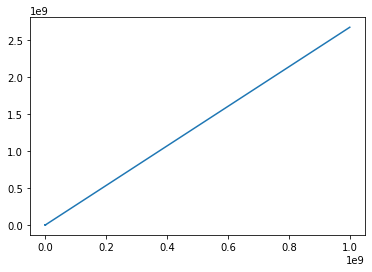

In [51]:
plt.plot(sol.t, sol.y[-1])

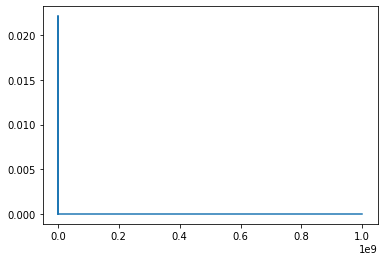

In [56]:
plt.plot(sol.t, sol.y[4])

In [32]:
nutrient = np.arange(0, 1e4)
growth_rate = []
for s0 in nutrient:
    loop = solve_ivp(model, [t0, tf], init, args=(params,), method='Radau')
    gamma = (gmax*loop.y[5][-1])/(Kgamma+loop.y[5][-1])
    ttrate = (loop.y[10][-1] + loop.y[11][-1] + loop.y[12][-1] + loop.y[13][-1] + loop.y[16][-1])*gamma
    lam = ttrate/M
    growth_rate.append(lam)

plt.plot(nutrient, growth_rate)



NameError: name 'Kgamma' is not defined

In [ ]:
print(len(growth_rate))